In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

from func2graph import data, models, tools

torch.Size([10, 30000])


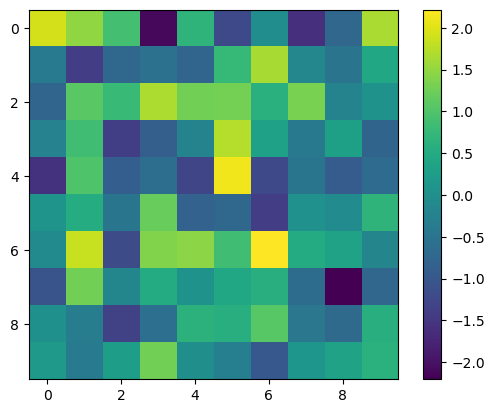

In [3]:
neuron_num = 10
dt = 0.001
tau = 0.3
total_time = 30000

spike_neuron_num = 2
spike_input = 5

train_data_size = 20000
window_size = 200
random_seed = 42
batch_size = 32

trainloader, validloader, weight_matrix = data.generate_simulation_data(
    neuron_num=neuron_num,
    dt=dt,
    tau=tau,
    total_time=total_time,
    spike_neuron_num=spike_neuron_num,
    spike_input=spike_input,
    train_data_size=train_data_size,
    window_size=window_size,
    random_seed=random_seed,
    batch_size=batch_size,
)

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

In [4]:
hidden_size_1=128
h_layers_1=2
heads=1
attention_layers=1
hidden_size_2=64
h_layers_2=2
learning_rate=1e-4

predict_mode_model = models.Attention_Autoencoder(
    neuron_num=neuron_num,
    window_size=window_size,
    hidden_size_1=hidden_size_1,
    h_layers_1=h_layers_1,
    heads=heads,
    attention_layers=attention_layers,
    hidden_size_2=hidden_size_2,
    h_layers_2=h_layers_2,
    learning_rate=learning_rate,
    prediction_mode=True,     ########################
)

In [ ]:
checkpoint_path = "func2graph/checkpoints/attention_autoencoder/epoch=199.ckpt"
predictions, attentions = tools.get_avg_attention(trainloader, predict_mode_model, checkpoint_path, neuron_num)